In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"C:\Users\sharw\OneDrive\Desktop\ML\diminos_data.csv")

In [3]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.shape

(15000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [9]:
(df['order_delivered_at']-df['order_placed_at']).dt.total_seconds()/60

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Length: 15000, dtype: float64

In [10]:
df['delivery_time_minutes']=(df['order_delivered_at']-df['order_placed_at']).dt.total_seconds()/60

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               15000 non-null  int64         
 1   order_placed_at        15000 non-null  datetime64[ns]
 2   order_delivered_at     15000 non-null  datetime64[ns]
 3   delivery_time_minutes  15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 468.9 KB


In [12]:
df['delivery_time_minutes'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_minutes, dtype: float64

In [13]:
df['delivery_time_minutes'].describe(percentiles=[0.95])

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
50%         15.797986
95%         27.261044
max       7299.831375
Name: delivery_time_minutes, dtype: float64

In [14]:
df['delivery_time_minutes'].quantile(0.95)

27.261043996666658

- 95% of orders are delivered in 27.26 minutes 
- So Kanav is safe for now and won’t lose the franchise


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='delivery_time_minutes', ylabel='Count'>

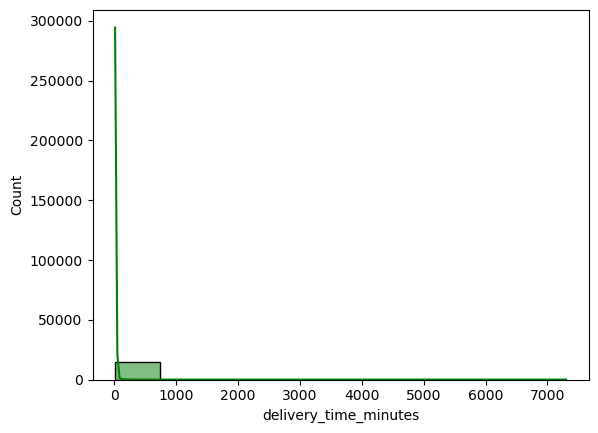

In [16]:
sns.histplot(data=df,x='delivery_time_minutes',bins=10,kde=True,color='green')

<Axes: xlabel='delivery_time_minutes', ylabel='Count'>

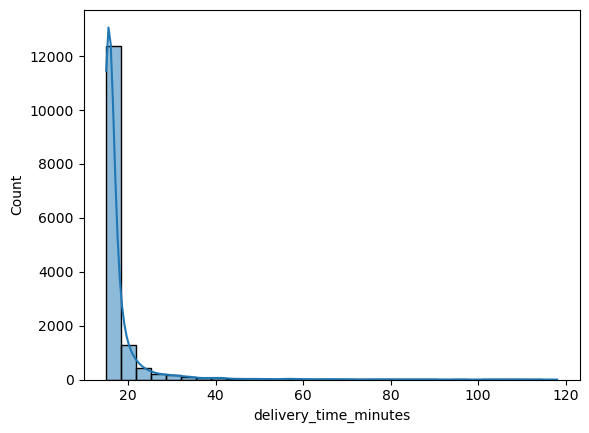

In [17]:
df_filtered = df[df['delivery_time_minutes'] <= 120]
sns.histplot(data=df_filtered, x='delivery_time_minutes', bins=30, kde=True)

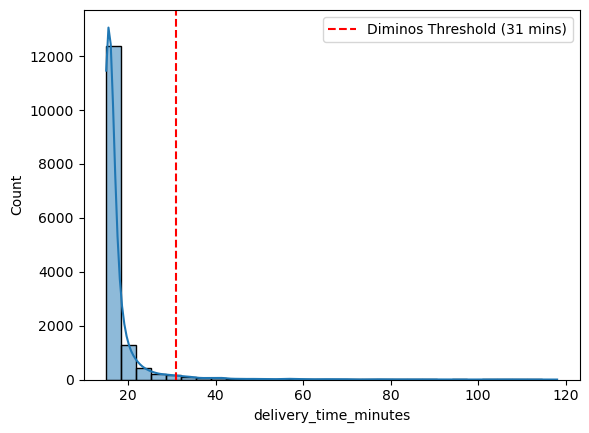

In [18]:
sns.histplot(data=df_filtered, x='delivery_time_minutes', bins=30, kde=True)
plt.axvline(x=31, color='red', linestyle='--', label='Diminos Threshold (31 mins)')
plt.legend()

<Axes: xlabel='delivery_time_minutes'>

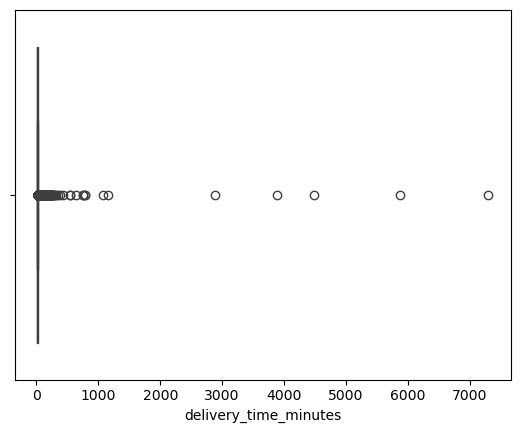

In [19]:
sns.boxplot(data=df, x='delivery_time_minutes')

In [20]:
#Peak hours with highest delivery time

In [21]:
df['hour'] = df['order_placed_at'].dt.hour

In [22]:
df['hour']

0         0
1         0
2         0
3         0
4         0
         ..
14995    23
14996    23
14997    23
14998    23
14999    23
Name: hour, Length: 15000, dtype: int32

In [23]:
hour_avg=df.groupby('hour')['delivery_time_minutes'].mean().sort_values(ascending=False)
hour_avg

hour
9     33.320277
17    30.352864
11    25.908233
0     24.116781
10    21.014310
1     20.836201
3     19.846034
12    19.731810
8     19.264601
20    19.247353
2     19.123197
14    18.999574
22    18.963806
4     18.818769
16    18.711819
23    18.544586
6     18.501060
13    18.403554
7     18.368406
21    18.263140
19    18.253996
18    17.758926
5     17.727910
15    17.619334
Name: delivery_time_minutes, dtype: float64

<Axes: xlabel='hour', ylabel='Count'>

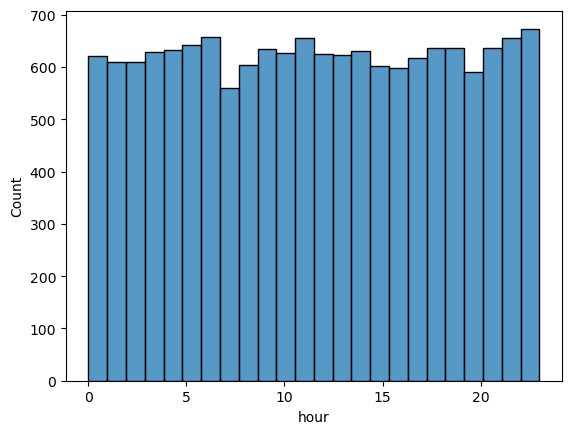

In [25]:
sns.histplot(data=df, x='hour')

<Axes: xlabel='hour'>

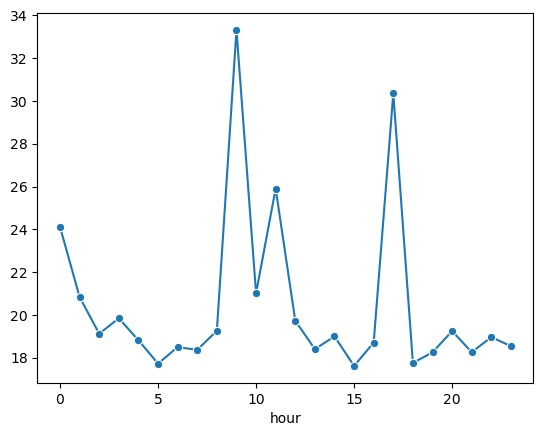

In [27]:
sns.lineplot(x=hour_avg.index, y=hour_avg.values, marker='o')

In [28]:
#Days with poor performance
df['weekday'] = df['order_placed_at'].dt.day_name()
weekday_avg = df.groupby('weekday')['delivery_time_minutes'].mean().sort_values(ascending=False)
weekday_avg

weekday
Sunday       23.948561
Friday       22.096958
Wednesday    21.715532
Tuesday      19.256920
Monday       19.027073
Saturday     18.698583
Thursday     18.485932
Name: delivery_time_minutes, dtype: float64

<Axes: xlabel='weekday'>

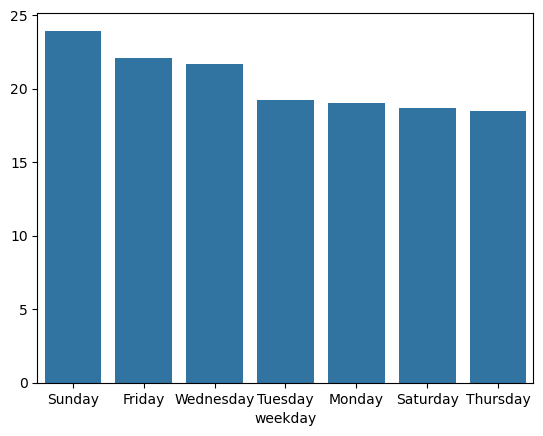

In [29]:
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)

- The store’s 95th percentile delivery time is 27 minutes, which is below the 31‑minute limit set by Dominos.
This means Kanav’s store is safe and performing well.
- Most deliveries happen in 20–25 minutes, which is good.
Only a few orders take longer than 31 minutes — those are rare delays.
- Peak hours (like lunch and dinner times) are a bit slower because of more orders.
Some days (like weekends) also show slightly higher delivery times.


#### Recommendations for Kanav
- Add more staff during busy hours to handle the rush.
- Use better delivery routes to save time.
- Try batching nearby orders together so one trip covers multiple customers.
- Check the few very late deliveries to see what went wrong
